In [44]:
%load_ext autoreload
%autoreload 2
import os
import typing as T
import pickle as pkl
import matplotlib.pyplot as plt

import cv2
import yaml
import requests
import torch
import torch.nn as nn
import numpy as np
from xarray import DataArray
from tqdm.auto import tqdm

In [3]:
# image_path = "../tmp/user_input.jpeg"
image_blue_path = "/Users/gkreder/Downloads/nuclear_blue_image.jpg"

In [5]:
cv2.imread(image_blue_path).shape

(730, 1000, 3)

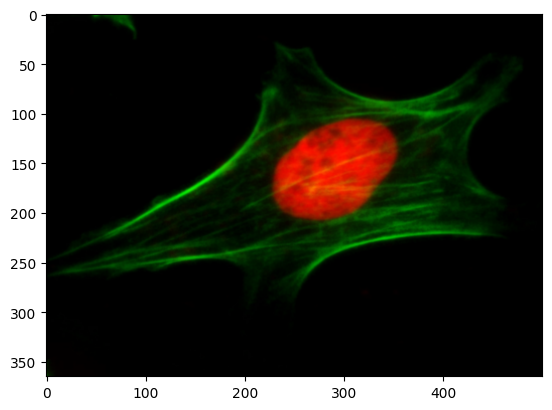

In [6]:
img = cv2.imread(image_blue_path)

plt.imshow(cv2.pyrDown(img))

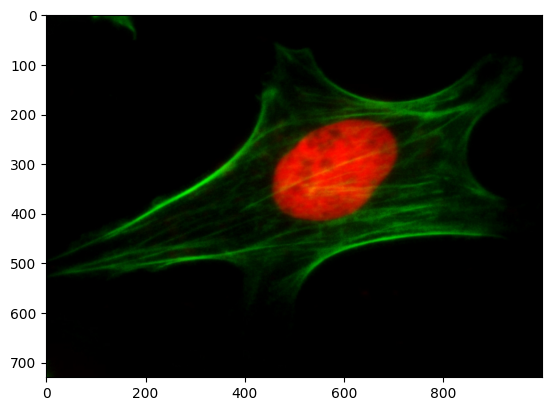

In [7]:
plt.imshow(img)

In [8]:
model_img = np.load("../tmp/image_db/input_images/affable-shark.npy")

In [9]:
model_img.shape

(1, 1, 256, 256)

In [10]:
model_img[:,:,:].shape

(1, 1, 256, 256)

In [12]:
input_image = model_img
input_axes = 'bcxy'

In [13]:
def paint_image(input_image, input_format = "bcxy", output_channels = 3):
    return(input_image)

In [34]:
from skimage import exposure
from matplotlib.colors import LinearSegmentedColormap

# Function to create a custom colormap from white to a specified color
def create_colormap(color_input: str | tuple, empty_val_rgb = (0,0,0)):
    return LinearSegmentedColormap.from_list("custom_color", [empty_val_rgb, color_input], N=256) # Change to (1,1,1) if you want white to be the empty value instead of black

input_image = model_img.copy()
input_format = "bcxy"
output_channels = 3

input_format = input_format.lower()
if 'b' in input_format:
    input_image = np.mean(input_image, axis = input_format.index('b'))
    input_format = ''.join([x for x in input_format if x != 'b'])
if 'z' in input_format:
    input_image = np.mean(input_image, axis = input_format.index('z'))
    input_format = ''.join([x for x in input_format if x != 'z'])
channel_index = input_format.index('c')
num_channels = input_image.shape[channel_index]
channel_colors = [(0,0,1), (0,1,0), (1,0,0), (0,0.5,0.5), (0.5,0,0.5), (0.5,0.5,0)]
painted_image = np.zeros((output_channels, input_image.shape[input_format.index("x")], input_image.shape[input_format.index("y")]))
for i_c in range(num_channels):
    channel_image = input_image.take(indices = i_c, axis = channel_index)
    channel_rgb = np.array(channel_colors[i_c])
    # channel_colormap = create_colormap(channel_rgb, empty_val_rgb='black')
    img_adapteq = exposure.equalize_adapthist(channel_image.astype('uint8'), clip_limit=0.01)
    channel_color_image = channel_rgb[:, np.newaxis, np.newaxis] * img_adapteq
    painted_image += channel_color_image
painted_image = painted_image.transpose(1,2,0) 



In [32]:
cv2.imwrite("/Users/gkreder/Downloads/test.png", painted_image.transpose(1,2,0))

True

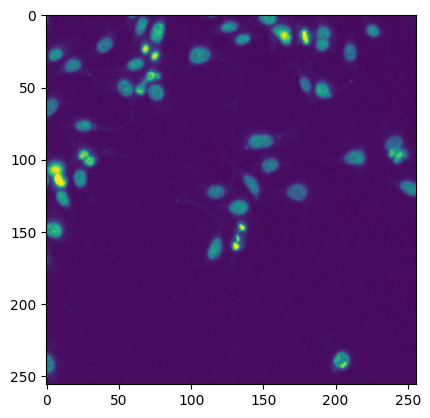

In [39]:
plt.imshow(painted_image[:,:,2])

In [43]:
painted_image[:,:,2].max()

1.0

In [45]:
from bioimageio_chatbot.image_processor import *

In [46]:
ip = ImageProcessor()

In [49]:
input_image = np.load("../tmp/image_db/input_images/affable-shark.npy")
input_image.shape

(1, 1, 256, 256)

In [ ]:
"bcyx"

In [61]:
out_image = ip.resize_image(input_image, "bcyx", output_format = "byxc", output_dims_xy = (224,224))

(1, 224, 224, 1)


ValueError: zero-dimensional arrays cannot be concatenated

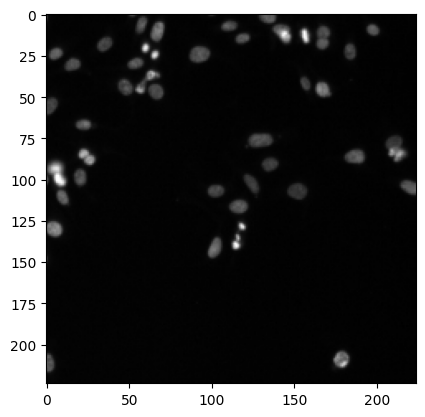

In [58]:
plt.imshow(out_image[0,:,:,0], cmap = "gray")